# Loading

In [ ]:
# Basic libraries
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import seaborn as sns

# Machine learning
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    GridSearchCV,
    cross_val_score
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.dummy import DummyClassifier # For baseline/ comparison model
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
# Still need to import SVM etc..
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from tensorflow import keras


In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import load_npz

# X: Label (DataFrames)
train_X_label = pd.read_csv("train_X_label.csv", index_col=0)
test_X_label  = pd.read_csv("test_X_label.csv", index_col=0)

# X: OneHot (Sparse matrices)
train_X_OneHot = load_npz("train_X_OneHot.npz")
test_X_OneHot  = load_npz("test_X_OneHot.npz")

# X: FCGR (NumPy arrays)
train_X_fcgr = np.load("train_X_fcgr.npy")
test_X_fcgr  = np.load("test_X_fcgr.npy")

# y: load as Series (each CSV is a 1-col file)
train_y_CIP = pd.read_csv("train_y_CIP.csv", index_col=0).iloc[:, 0]
test_y_CIP  = pd.read_csv("test_y_CIP.csv", index_col=0).iloc[:, 0]

train_y_CTX = pd.read_csv("train_y_CTX.csv", index_col=0).iloc[:, 0]
test_y_CTX  = pd.read_csv("test_y_CTX.csv", index_col=0).iloc[:, 0]

train_y_CTZ = pd.read_csv("train_y_CTZ.csv", index_col=0).iloc[:, 0]
test_y_CTZ  = pd.read_csv("test_y_CTZ.csv", index_col=0).iloc[:, 0]

train_y_GEN = pd.read_csv("train_y_GEN.csv", index_col=0).iloc[:, 0]
test_y_GEN  = pd.read_csv("test_y_GEN.csv", index_col=0).iloc[:, 0]

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix
)

In [ ]:
def runmodel(train_X, train_y, test_X, test_y, model_chosen, X_name, Y_name):
    if model_chosen == "logistic_regression":
        model = LogisticRegression(max_iter=2000)
    elif model_chosen == "random_forrest":
        model = RandomForestClassifier(
                n_estimators=200,        # number of trees
                max_depth=None,         # let trees grow
                min_samples_leaf=2,     # prevents overfitting
                max_features="sqrt",   # very important for high-dim data
                n_jobs=-1,              # use all CPU cores
                random_state=1)
    elif model_chosen == "SVM":
        model = SVC(kernel="linear", probability=True, random_state=1)
    else:
        raise ValueError("Unknown model")

    model.fit(train_X, train_y)

    y_pred = model.predict(test_X)

    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(test_X)[:, 1]
    else:
        y_score = model.decision_function(test_X)

    acc  = accuracy_score(test_y, y_pred)
    prec = precision_score(test_y, y_pred, zero_division=0)
    rec  = recall_score(test_y, y_pred, zero_division=0)
    f1   = f1_score(test_y, y_pred, zero_division=0)
    auc  = roc_auc_score(test_y, y_score)

    fpr, tpr, thresholds = roc_curve(test_y, y_score)
    cm = confusion_matrix(test_y, y_pred, normalize="true")

    return {
        "model": model_chosen,
        "X_encoding": X_name,
        "antibiotic": Y_name,
        "accuracy": float(acc),
        "precision": float(prec),
        "recall": float(rec),
        "f1": float(f1),
        "roc_auc": float(auc),
        "confusion_matrix": cm,
        "fpr": fpr,
        "tpr": tpr,
        "thresholds": thresholds,
    }

In [ ]:
models = [
    "logistic_regression",
    "random_forrest",
    "SVM"
]

train_X_sets = [
    train_X_label,
    train_X_OneHot,
    train_X_fcgr
]

test_X_sets = [
    test_X_label,
    test_X_OneHot,
    test_X_fcgr
]

test_y_sets = [
    test_y_CIP,
    test_y_CTX,
    test_y_CTZ,
    test_y_GEN
]

train_y_sets = [
    train_y_CIP,
    train_y_CTX,
    train_y_CTZ,
    train_y_GEN
]


In [ ]:
train_X_fcgr_flat = train_X_fcgr.reshape(train_X_fcgr.shape[0], -1)
test_X_fcgr_flat  = test_X_fcgr.reshape(test_X_fcgr.shape[0], -1)

# Workspace

In [ ]:
import pickle

with open("/content/genomic_ml_results_partial (11).pkl", "rb") as f:
    all_results = pickle.load(f)

print("Loaded", len(all_results), "completed runs")

Loaded 36 completed runs


In [ ]:
import pickle
with open("genomic_ml_results_partial.pkl", "wb") as f:
    pickle.dump(all_results, f)

In [ ]:
from google.colab import files
files.download("genomic_ml_results_partial.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Results checking

In [ ]:
df_results = pd.DataFrame(all_results)

In [ ]:
df_table = df_results[[
    "model",
    "X_encoding",
    "antibiotic",
    "accuracy",
    "precision",
    "recall",
    "f1",
    "roc_auc"
]]

In [ ]:
df_table

,model,X_encoding,antibiotic,accuracy,precision,recall,f1,roc_auc
0,logistic_regression,Label,CIP,0.913580,0.873418,0.945205,0.907895,0.949361
1,logistic_regression,Label,CTX,0.740741,0.697368,0.736111,0.716216,0.797377
2,logistic_regression,Label,CTZ,0.771605,0.645161,0.727273,0.683761,0.802549
3,logistic_regression,Label,GEN,0.728395,0.410256,0.432432,0.421053,0.737297
4,logistic_regression,OneHot,CIP,0.925926,0.906667,0.931507,0.918919,0.952747
5,logistic_regression,OneHot,CTX,0.796296,0.767123,0.777778,0.772414,0.820833
6,logistic_regression,OneHot,CTZ,0.790123,0.666667,0.763636,0.711864,0.835684
7,logistic_regression,OneHot,GEN,0.753086,0.459459,0.459459,0.459459,0.742703
8,logistic_regression,FCGR,CIP,0.901235,0.870130,0.917808,0.893333,0.954287
9,logistic_regression,FCGR,CTX,0.796296,0.782609,0.750000,0.765957,0.847994


In [ ]:
df_table.sort_values(by = "roc_auc", ascending = False)

,model,X_encoding,antibiotic,accuracy,precision,recall,f1,roc_auc
16,random_forrest,OneHot,CIP,0.925926,0.886076,0.958904,0.921053,0.971217
12,random_forrest,Label,CIP,0.932099,0.897436,0.958904,0.927152,0.967754
20,random_forrest,FCGR,CIP,0.925926,0.906667,0.931507,0.918919,0.967754
8,logistic_regression,FCGR,CIP,0.901235,0.870130,0.917808,0.893333,0.954287
4,logistic_regression,OneHot,CIP,0.925926,0.906667,0.931507,0.918919,0.952747
0,logistic_regression,Label,CIP,0.913580,0.873418,0.945205,0.907895,0.949361
32,SVM,FCGR,CIP,0.888889,0.848101,0.917808,0.881579,0.947668
28,SVM,OneHot,CIP,0.901235,0.860759,0.931507,0.894737,0.936278
24,SVM,Label,CIP,0.882716,0.837500,0.917808,0.875817,0.929198
14,random_forrest,Label,CTZ,0.870370,0.803571,0.818182,0.810811,0.909091


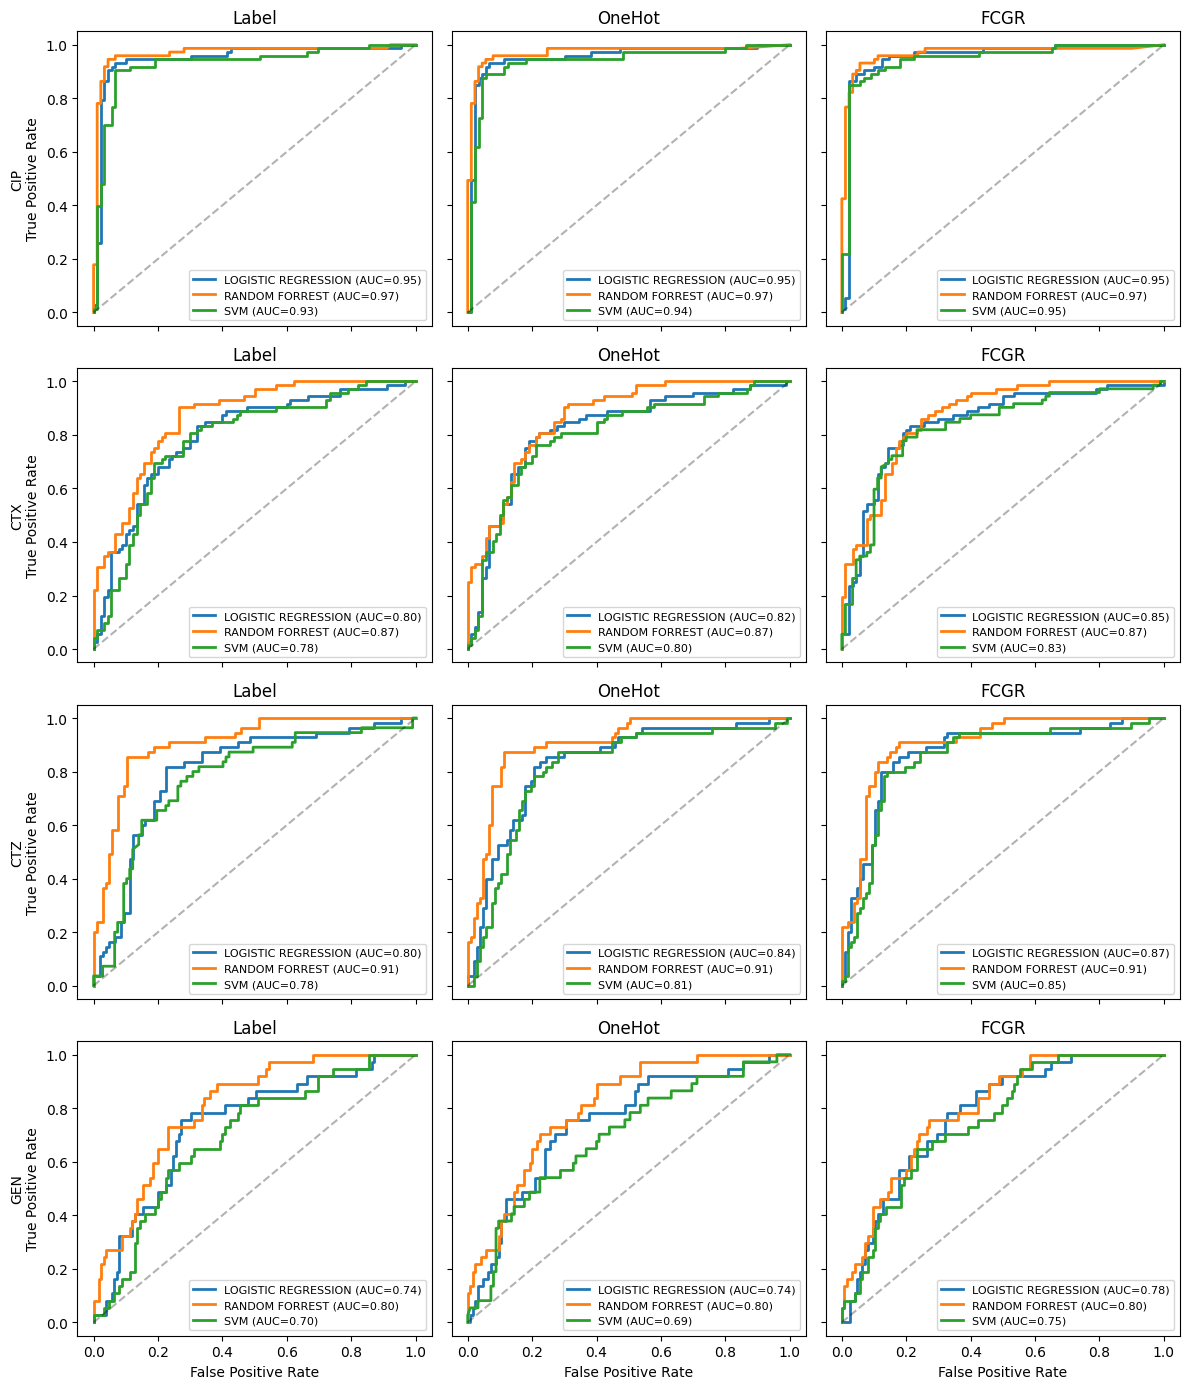

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(all_results)

antibiotics = ["CIP","CTX","CTZ","GEN"]
encodings = ["Label","OneHot","FCGR"]
models = ["logistic_regression","random_forrest","SVM"]

fig, axes = plt.subplots(4, 3, figsize=(12, 14), sharex=True, sharey=True)

for i, ab in enumerate(antibiotics):
    for j, enc in enumerate(encodings):
        ax = axes[i, j]
        subset = df[(df.antibiotic==ab) & (df.X_encoding==enc)]

        for model in models:
            row = subset[subset.model==model].iloc[0]

            ax.plot(row.fpr, row.tpr, linewidth=2,
                    label=f"{model.replace('_',' ').upper()} (AUC={row.roc_auc:.2f})")

        ax.plot([0,1],[0,1],'k--',alpha=0.3)

        if j == 0:
            ax.set_ylabel(f"{ab}\nTrue Positive Rate")
        if i == 3:
            ax.set_xlabel("False Positive Rate")

        ax.set_title(enc)
        ax.legend(fontsize=8)

plt.tight_layout()
plt.savefig("ROC_all_models.png", dpi=600)
plt.show()